## Autoencoder [blog-post](https://blog.keras.io/building-autoencoders-in-keras.html)

In [1]:
import keras
from keras import layers

In [2]:
encoding_dims = 32

input_img = keras.Input(shape = (784, ))

encoded = layers.Dense(encoding_dims, activation="relu")(input_img)

decoded = layers.Dense(784, activation="sigmoid")(encoded)

autoencoder = keras.Model(input_img, decoded)

In [3]:
encoder = keras.Model(input_img, encoded)

In [4]:
encoded_input = keras.Input(shape=(encoding_dims, ))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 31s 3us/step


In [7]:
print(f"xtrain -{x_train.shape}; xtest-{x_test.shape}")
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

xtrain -(60000, 28, 28); xtest-(10000, 28, 28)
(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 10s 17ms/step - loss: 0.2746 - val_loss: 0.1897
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1710 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1440 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1282 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1181 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1111 - val_loss: 0.1069
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1019 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0972 - val_l

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

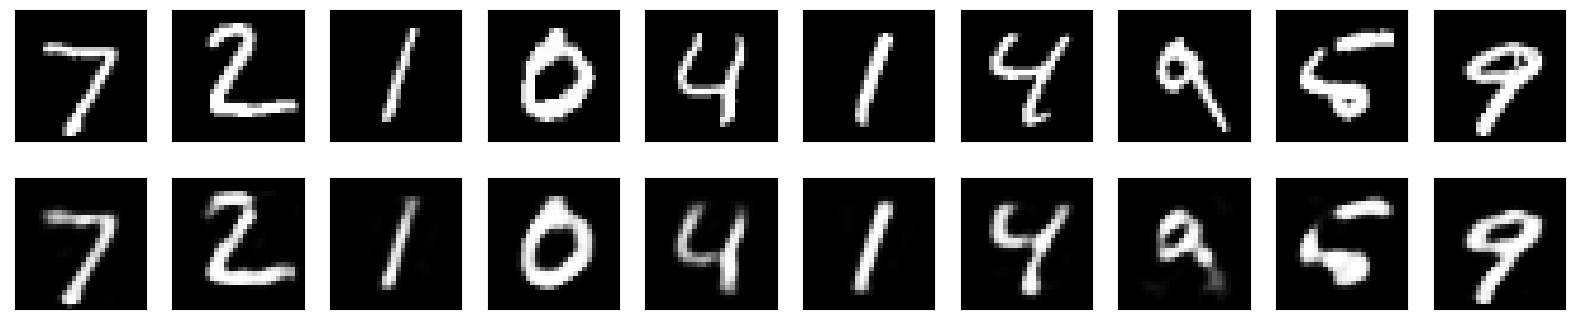

In [10]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.2845 - val_loss: 0.1961
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1787 - val_loss: 0.1628
Epoch 3/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1544 - val_loss: 0.1443
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1395 - val_loss: 0.1324
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1297 - val_loss: 0.1242
Epoch 6/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1227 - val_loss: 0.1183
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1175 - val_loss: 0.1141
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1139 - val_loss: 0.1110
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1112 - val_loss: 0.1087
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1094 - val_lo

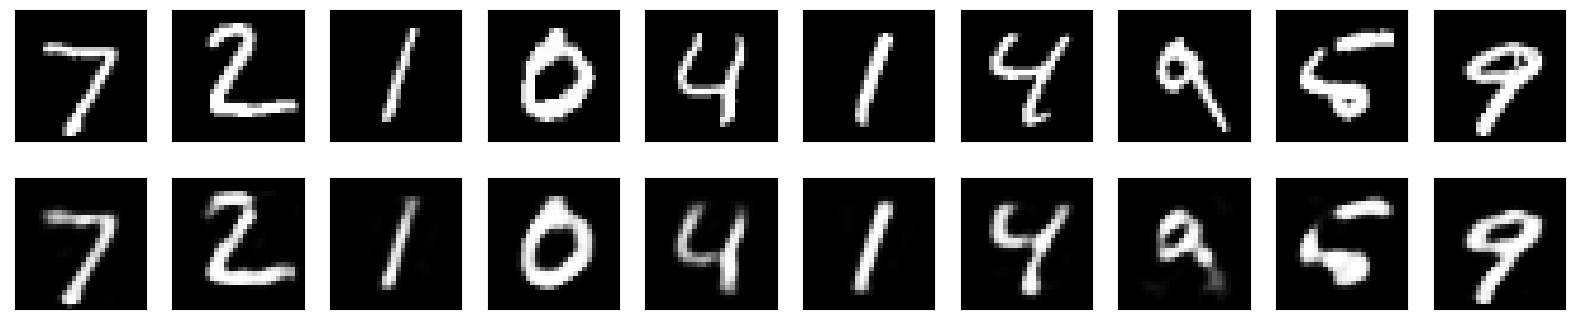

In [11]:
from keras import regularizers
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/100
235/235 [==============================] - 6s 22ms/step - loss: 0.2530 - val_loss: 0.1659
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1501 - val_loss: 0.1372
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1330 - val_loss: 0.1265
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1237 - val_loss: 0.1194
Epoch 5/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1174 - val_loss: 0.1138
Epoch 6/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1132 - val_loss: 0.1103
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1098 - val_loss: 0.1068
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1065 - val_loss: 0.1037
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1040 - val_loss: 0.1018
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.102

235/235 [==============================] - 4s 16ms/step - loss: 0.0820 - val_loss: 0.0817
Epoch 81/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0820 - val_loss: 0.0818
Epoch 82/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0819 - val_loss: 0.0818
Epoch 83/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0819 - val_loss: 0.0816
Epoch 84/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0818 - val_loss: 0.0818
Epoch 85/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0818 - val_loss: 0.0815
Epoch 86/100
235/235 [==============================] - 4s 18ms/step - loss: 0.0818 - val_loss: 0.0817
Epoch 87/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0817 - val_loss: 0.0815
Epoch 88/100
235/235 [==============================] - 5s 21ms/step - loss: 0.0816 - val_loss: 0.0814
Epoch 89/100
235/235 [==============================] - 4s 18ms/step - loss: 0.0816 - 

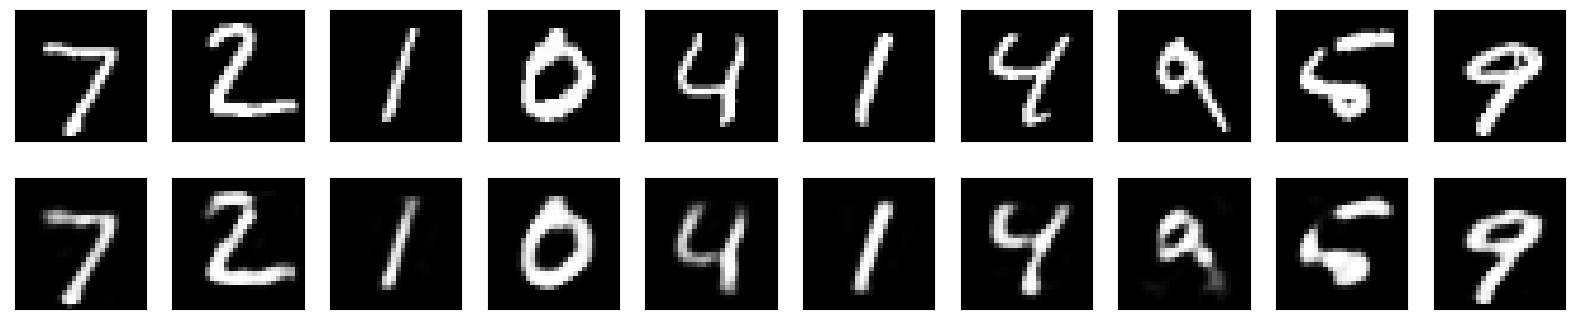

In [12]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder

In [13]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [14]:
# import os
# # print(os.getcwd())
# # os.makedirs(os.path.join(os.getcwd(), "logs"))
# os.path.exists(os.path.join(os.getcwd(), "/logs"))
# log_dir = os.path.join(os.getcwd(), "/logs")
# # os.makedirs(os.path.join(os.getcwd, log_dir), exist_ok=True)
# print(os.path.exists(log_dir))

In [15]:
# # os.makedirs(os.path.join(os.getcwd(), "logs"))
# log_dir = os.path.join(os.getcwd(), "/logs")
# # os.makedirs(os.path.join(os.getcwd, log_dir), exist_ok=True)
# print(os.path.exists(log_dir))
# tensorboard --logdir = log_dir

# from keras.callbacks import TensorBoard
# %load_ext tensorboard
# %tensorboard --logdir logs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 51s 72ms/step - loss: 0.2128 - val_loss: 0.1467
Epoch 2/50
469/469 [==============================] - 25s 53ms/step - loss: 0.1366 - val_loss: 0.1270
Epoch 3/50
469/469 [==============================] - 24s 50ms/step - loss: 0.1231 - val_loss: 0.1174
Epoch 4/50
469/469 [==============================] - 24s 51ms/step - loss: 0.1157 - val_loss: 0.1124
Epoch 5/50
469/469 [==============================] - 24s 51ms/step - loss: 0.1111 - val_loss: 0.1082
Epoch 6/50
469/469 [==============================] - 24s 52ms/step - loss: 0.1080 - val_loss: 0.1060
Epoch 7/50
469/469 [==============================] - 24s 52ms/step - loss: 0.1058 - val_loss: 0.1043
Epoch 8/50
469/469 [==============================] - 24s 52ms/step - loss: 0.1042 - val_loss: 0.1022
Epoch 9/50
469/469 [==============================] - 24s 52ms/step - loss: 0.1028 - val_loss: 0.1009
Epoch 10/50
469/469 [==============================] - 24s 52ms/step - loss: 0.101

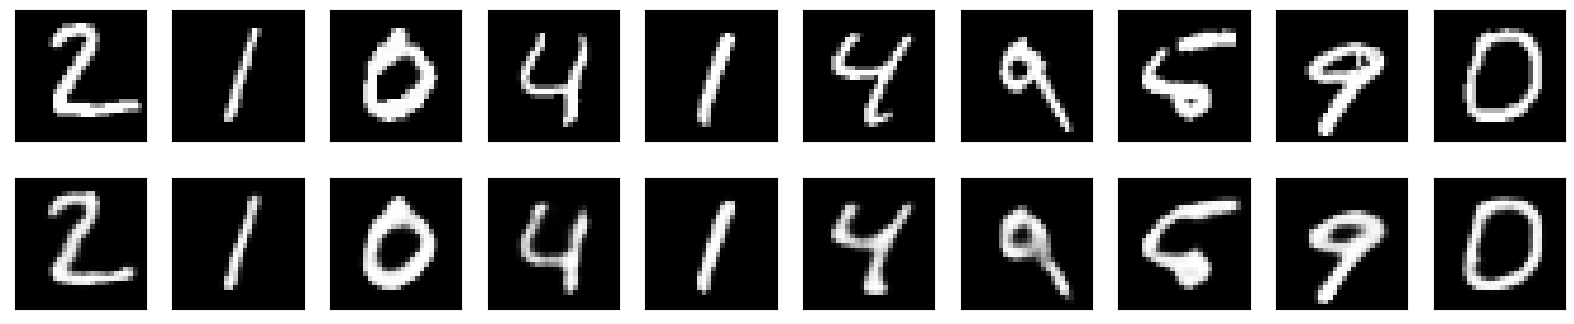

In [16]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()